In [1]:
"""
Function to align a fits image, then create subtraction image

Date: 07/12/22
Author: Iman Behbehani
"""

import astropy

from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm

In [2]:
import astroalign as aa

from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles

In [3]:
import cv2
import imutils

# Let's Subtract <3

In [4]:
# set image 1, image 2

# image 1
hdu1010 = fits.open("/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot4/sw00091683035um2_sk.fits", mode = 'update')
hdu1010[1].header['EXTNAME'] = 'SCI'
hdu1010[1].header['EXTVER'] = 1
data1 = hdu1010[1].data #this is already a numpy.ndarray
header10 = hdu1010[0].header
header11 = hdu1010[1].header

# image 2
hdu3010 = fits.open("/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot4/sw00091683042um2_sk.fits", mode = 'update')
hdu3010[1].header['EXTNAME'] = 'SCI'
hdu3010[1].header['EXTVER'] = 1
data2 = hdu3010[1].data
header20 = hdu3010[0].header
header21 = hdu3010[1].header

data = np.array(data1)


In [5]:
#making backup. mapping 1 onto 2
hdu1010a = hdu1010
data1a = hdu1010[1].data
header10a = hdu1010[0].header 
header11a = hdu1010[1].header

hdu3010a = hdu3010
data2a = hdu3010[1].data
header20a = hdu3010[0].header
header21a = hdu3010[1].header

### finding and scaling exposures

In [6]:
header11['TELAPSE']
exp = header11["TELAPSE"]
data11a = data1a/exp

In [7]:
header21['TELAPSE']
exp2 = header21["TELAPSE"]
data22a = data2/exp2

# CUTOUT AND DIFFERENCE
here I make crop the input images around a shared star. this aligns them with the same dimensions

In [22]:
def cutout (x, y, data, hdu, filename):

    #center of cutout area coordinates
    xcoord = x
    ycoord = y

    #size of cutout image
    xsize = 1000
    ysize = 1000

    #cutout function (see astropy.nddata for documentation)
    cutout = Cutout2D(data, (xcoord,ycoord),(ysize,xsize))

    #Show our new image
    norm = simple_norm(cutout.data, 'sqrt', percent=98.1) #linear, log, sqrt
    
    plt.imshow(cutout.data, norm=norm, origin='lower', cmap='viridis')
    plt.show()

    #Writing to FITS file
    fits_newfile_name = filename

    vhdr = hdu[0].header
    print(type(cutout))

    fits.writeto(fits_newfile_name,cutout.data,vhdr,overwrite=True)
    
    return cutout.data
    

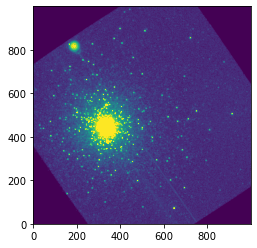

<class 'astropy.nddata.utils.Cutout2D'>


In [23]:
#making the cutout
cutout35 = hdu1010a

#picking the center
one = np.zeros((1, 2))
one[0] = [670.54499, 708.83398]

#saving to drive
filename = "/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot4/1cutout.fits"
cut1 = cutout(one[0][0], one[0][1], data11a, cutout35, filename)

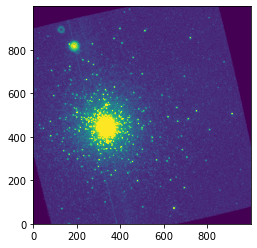

<class 'astropy.nddata.utils.Cutout2D'>


In [24]:
#second cutout
cutout42 = hdu3010a

#picking the center
one = np.zeros((1, 2))
one[0] = [625.45402, 604.54646]  

#saving to drive
filename = "/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot4/2cutout.fits"
cut2 = cutout(one[0][0], one[0][1], data22a, cutout42, filename)

### making difference image

In [26]:
difference = cv2.subtract(cut1, cut2)

### now saving image

In [28]:
hduu = fits.HDUList()
hduu.append(fits.PrimaryHDU())

#for img in export_array:
hduu.append(fits.ImageHDU(data=difference))

#giving difference image a proper header
hduu[0].header = hdu1010[0].header
hduu[1].header = hdu1010[1].header

hduu.writeto('/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot4/diff.fits', overwrite = True)

now, we can open the difference image in ds9 for analysis.